<a href="https://colab.research.google.com/github/srv/opencosmos/blob/main/opencosmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## GITHUB AND DRIVE MOUNT ##

if "setup" not in globals():
  !git clone https://@github.com/srv/opencosmos.git
  from google.colab import drive
  drive.mount('/content/drive')
  setup = True
# drive.flush_and_unmount()

Cloning into 'opencosmos'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 94 (delta 46), reused 43 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 19.67 MiB | 36.62 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Mounted at /content/drive


In [17]:
## INSTALLS AND IMPORTS ##

# use % for terminal commands (e.g. %ls)

!pip install matplotlib
!pip install rasterio
import rasterio
import rasterio.plot
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


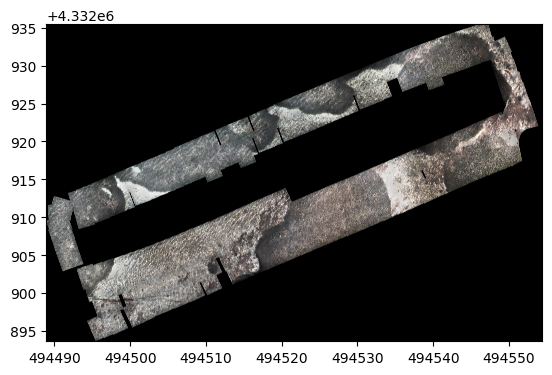

mosaic shape: (6948, 10757)
mosaic crs: EPSG:25831


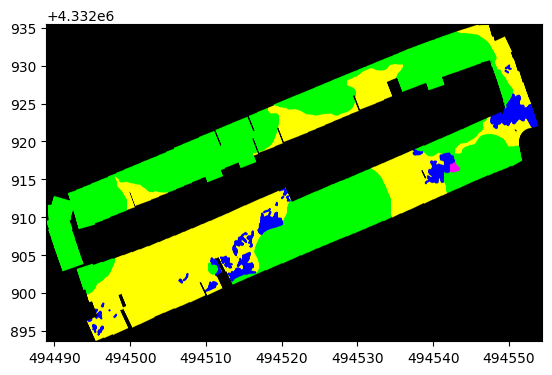

mosaic_seg shape: (6948, 10757)
mosaic_seg crs: EPSG:25831


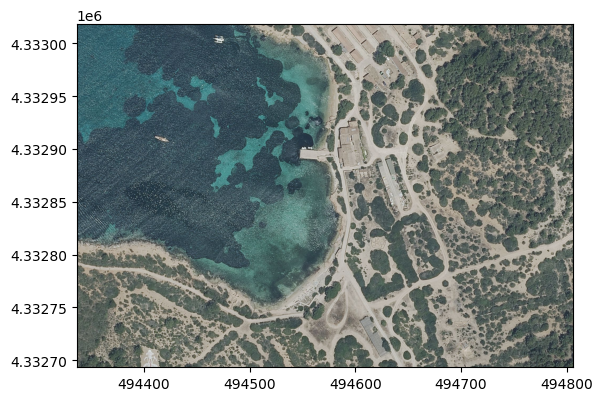

ortofoto shape: (1299, 1878)
ortofoto crs: EPSG:25831


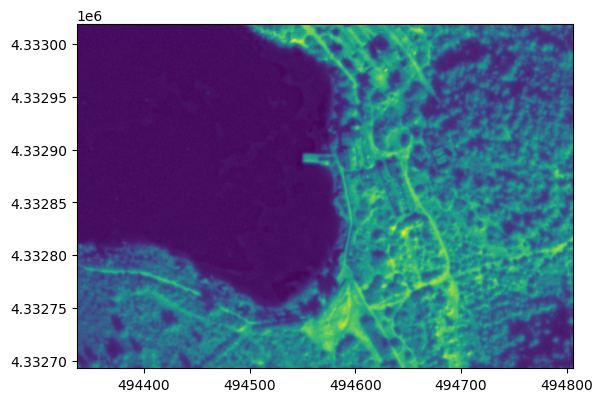

geosat shape: (434, 626)
geosat crs: EPSG:25831


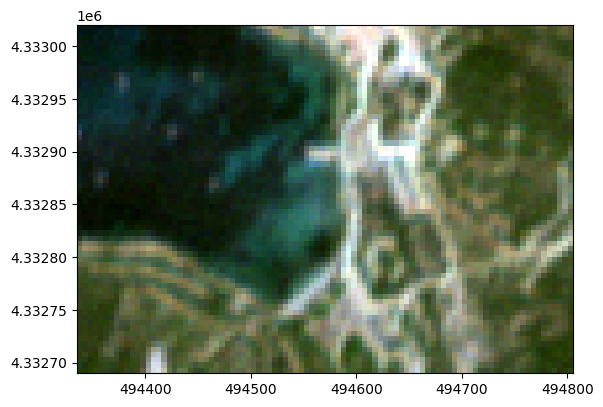

platero shape: (66, 94)
platero crs: EPSG:25831


In [23]:
## IMPORTS ##
# --- Mosaic ---
mosaic_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_05_02_2025.tif"
mosaic_tif = rasterio.open(mosaic_path)
rasterio.plot.show(mosaic_tif)
print("mosaic shape:", mosaic_tif.shape)
print("mosaic crs:", mosaic_tif.crs)

# --- Mosaic segmentation ---
mosaic_seg_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/cabrera_seg_05_02_2025.tif"
mosaic_seg_tif = rasterio.open(mosaic_seg_path)
rasterio.plot.show(mosaic_seg_tif)
print("mosaic_seg shape:", mosaic_seg_tif.shape)
print("mosaic_seg crs:", mosaic_seg_tif.crs)

# --- Ortofoto ---
ortofoto_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/clip_ortofoto_Cabrera_2024.tif"
ortofoto_tif = rasterio.open(ortofoto_path)
rasterio.plot.show(ortofoto_tif)
print("ortofoto shape:", ortofoto_tif.shape)
print("ortofoto crs:", ortofoto_tif.crs)

# --- Geosat ---
geosat_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/Clip_Geosat_Cabrera_20230204.tif"
geosat_tif = rasterio.open(geosat_path)
rasterio.plot.show(geosat_tif)
print("geosat shape:", geosat_tif.shape)
print("geosat crs:", geosat_tif.crs)

# --- Platero ---
platero_path = "drive/MyDrive/opencosmos/data/cabrera_geoloc/tifs_25831/clip_Platero_20250809.tif"
platero_tif = rasterio.open(platero_path)
rasterio.plot.show(platero_tif)
print("platero shape:", platero_tif.shape)
print("platero crs:", platero_tif.crs)






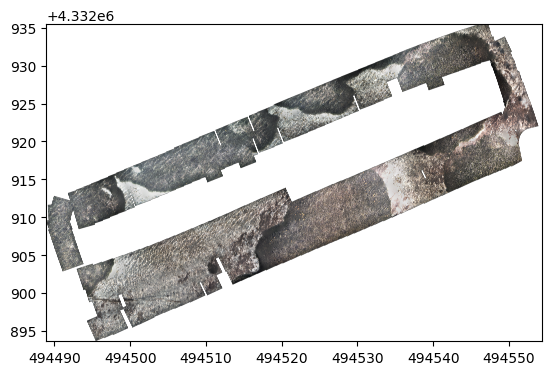

mosaic_clip shape: (4, 6948, 10757)


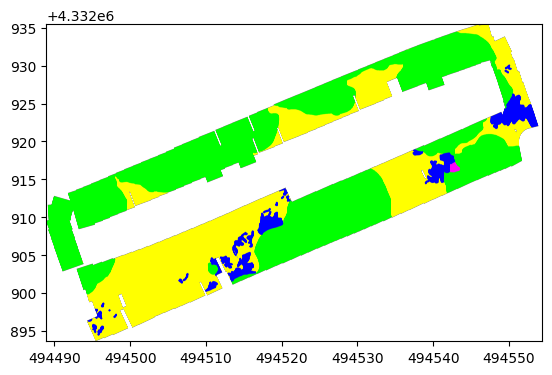

mosaic_seg_clip shape: (4, 6948, 10757)


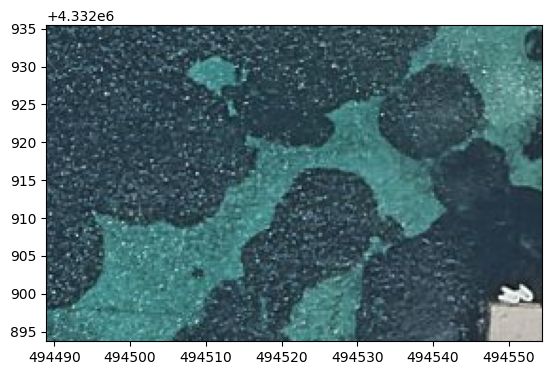

ortofoto_clip shape: (3, 167, 262)


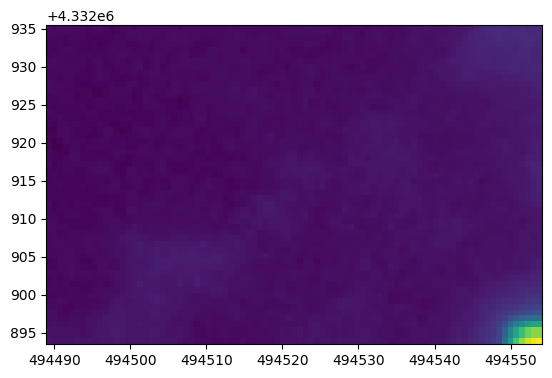

geosat_clip shape: (4, 56, 87)


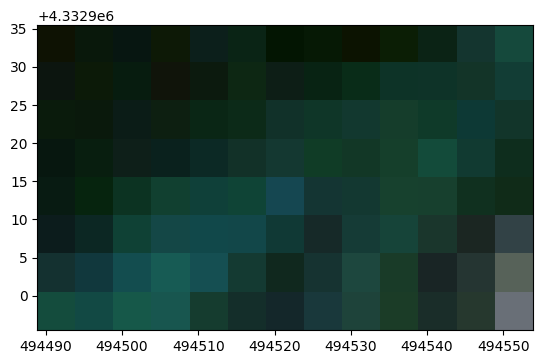

platero_clip shape: (3, 8, 13)


In [29]:

from rasterio.windows import from_bounds
import rasterio.plot

bounds = mosaic_tif.bounds  # mosaic area reference

# mosaic
mosaic_window = from_bounds(*bounds, transform=mosaic_tif.transform)
mosaic_clip = mosaic_tif.read(window=mosaic_window)
mosaic_clip_transform = mosaic_tif.window_transform(mosaic_window)
rasterio.plot.show(mosaic_clip, transform=mosaic_clip_transform)
print("mosaic_clip shape:", mosaic_clip.shape)

# mosaic_seg
mosaic_seg_window = from_bounds(*bounds, transform=mosaic_seg_tif.transform)
mosaic_seg_clip = mosaic_seg_tif.read(window=mosaic_seg_window)
mosaic_seg_clip_transform = mosaic_seg_tif.window_transform(mosaic_seg_window)
rasterio.plot.show(mosaic_seg_clip, transform=mosaic_seg_clip_transform)
print("mosaic_seg_clip shape:", mosaic_seg_clip.shape)

# ortofoto
ortofoto_window = from_bounds(*bounds, transform=ortofoto_tif.transform)
ortofoto_clip = ortofoto_tif.read(window=ortofoto_window)
ortofoto_clip_transform = ortofoto_tif.window_transform(ortofoto_window)
rasterio.plot.show(ortofoto_clip, transform=ortofoto_clip_transform)
print("ortofoto_clip shape:", ortofoto_clip.shape)

# Geosat
geosat_window = from_bounds(*bounds, transform=geosat_tif.transform)
geosat_clip = geosat_tif.read(window=geosat_window)
geosat_clip_transform = geosat_tif.window_transform(geosat_window)
rasterio.plot.show(geosat_clip[1], transform=geosat_clip_transform)
print("geosat_clip shape:", geosat_clip.shape)

# Platero
platero_window = from_bounds(*bounds, transform=platero_tif.transform)
platero_clip = platero_tif.read(window=platero_window)
platero_clip_transform = platero_tif.window_transform(platero_window)
rasterio.plot.show(platero_clip, transform=platero_clip_transform)
print("platero_clip shape:", platero_clip.shape)

In [27]:
import rasterio
from rasterio.enums import Resampling

def resample_to_target(src_raster, target_raster):

    # Read target raster properties
    target_height = target_raster.height
    target_width = target_raster.width
    target_transform = target_raster.transform

    # Read source raster data
    src_array = src_raster.read(out_shape=(src_raster.count,target_height,target_width), resampling=Resampling.bilinear)

    # Scale the transform to match new shape
    scale_x = src_raster.width / target_width
    scale_y = src_raster.height / target_height
    new_transform = src_raster.transform * src_raster.transform.scale(scale_x, scale_y)

    return src_array, new_transform

# --- Mosaic ---
mosaic_resampled_array, mosaic_resampled_transform = resample_to_target(mosaic_tif, ortofoto_tif)
print("Mosaic resampled shape:", mosaic_resampled_array.shape)
# --- Mosaic Segmentation ---
mosaic_seg_resampled_array, mosaic_seg_resampled_transform = resample_to_target(mosaic_seg_tif, ortofoto_tif)
print("Mosaic Segmentation resampled shape:", mosaic_seg_resampled_array.shape)
# --- Geosat ---
geosat_resampled_array, geosat_resampled_transform = resample_to_target(geosat_tif, ortofoto_tif)
print("Geosat resampled shape:", geosat_resampled_array.shape)
# --- Platero ---
platero_resampled_array, platero_resampled_transform = resample_to_target(platero_tif, ortofoto_tif)
print("Platero resampled shape:", platero_resampled_array.shape)


Mosaic resampled shape: (4, 1299, 1878)
Mosaic Segmentation resampled shape: (4, 1299, 1878)
Geosat resampled shape: (4, 1299, 1878)
Platero resampled shape: (3, 1299, 1878)


Target resolution: (0.25, 0.25)
Target CRS: EPSG:25831


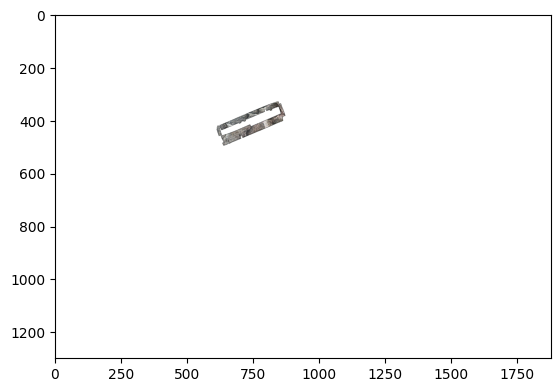

mosaic resampled shape: (4, 1299, 1878)


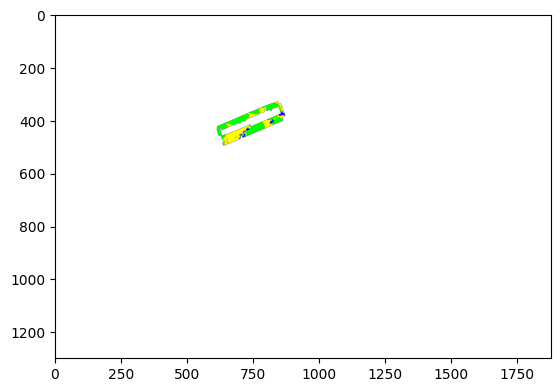

mosaic seg resampled  shape: (4, 1299, 1878)


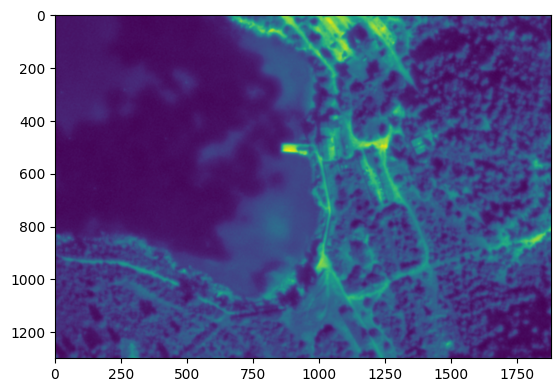

geosat resampled shape: (4, 1299, 1878)


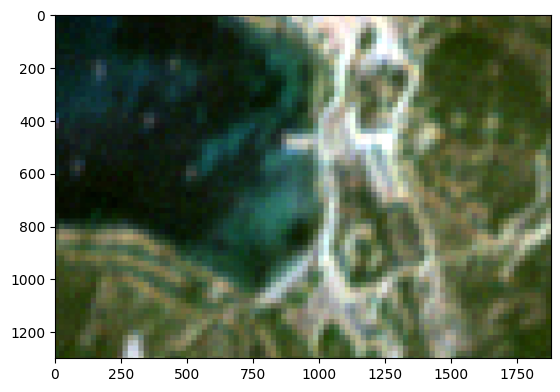

platero shape: (3, 1299, 1878)


In [31]:


## RESAMPLE 1 ##

import rasterio
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio.windows import from_bounds
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt

target_transform = ortofoto_tif.transform
target_crs = ortofoto_tif.crs
target_width = ortofoto_tif.width
target_height = ortofoto_tif.height

print("Target resolution:", ortofoto_tif.res)
print("Target CRS:", ortofoto_tif.crs)

## RESAMPLE ALL TO ORTOFOTO GRID ##

def resample_to_target(src_tif, target_transform, target_crs, target_width, target_height):
    dst = np.empty((src_tif.count, target_height, target_width), dtype=src_tif.dtypes[0])
    reproject(
        source=rasterio.band(src_tif, list(range(1, src_tif.count + 1))),
        destination=dst,
        src_transform=src_tif.transform,
        src_crs=src_tif.crs,
        dst_transform=target_transform,
        dst_crs=target_crs,
        resampling=Resampling.nearest
    )
    return dst

mosaic_resampled = resample_to_target(mosaic_tif, target_transform, target_crs, target_width, target_height)
rasterio.plot.show(mosaic_resampled)
print("mosaic resampled shape:", mosaic_resampled.shape)
mosaic_seg_resampled = resample_to_target(mosaic_seg_tif, target_transform, target_crs, target_width, target_height)
rasterio.plot.show(mosaic_seg_resampled)
print("mosaic seg resampled  shape:", mosaic_seg_resampled.shape)
geosat_resampled = resample_to_target(geosat_tif, target_transform, target_crs, target_width, target_height)
rasterio.plot.show(geosat_resampled[2])
print("geosat resampled shape:", geosat_resampled.shape)
platero_resampled = resample_to_target(platero_tif, target_transform, target_crs, target_width, target_height)
rasterio.plot.show(platero_resampled)
print("platero shape:", platero_resampled.shape)



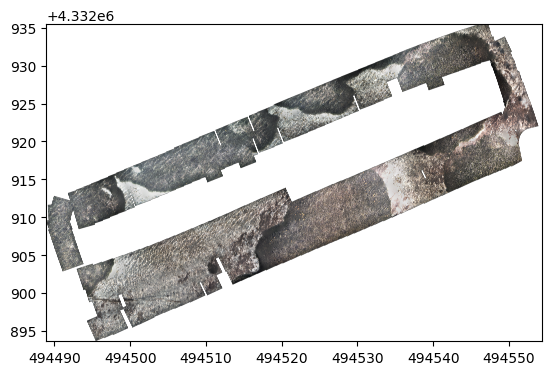

mosaic_resampled shape: (4, 6948, 10757)


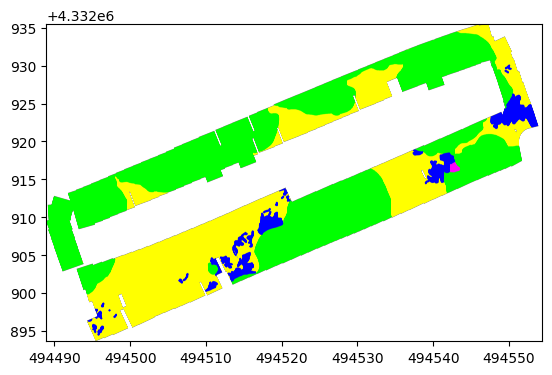

mosaic_seg_resampled shape: (4, 6948, 10757)


KeyboardInterrupt: 

In [32]:
## RESAMPLE ## TODO apply to geosat clip or ortofto clip, idk if this version or the one on top cell

from rasterio.warp import reproject, Resampling
import rasterio.plot
import numpy as np

target_transform = mosaic_tif.transform
target_crs = mosaic_tif.crs
target_height = mosaic_clip.shape[1]
target_width = mosaic_clip.shape[2]

## resample mosaic to 0.25 and others

mosaic_resampled = np.empty((mosaic_tif.count, target_height, target_width), dtype=mosaic_clip.dtype)
reproject(source=mosaic_clip, destination=mosaic_resampled, src_transform=mosaic_clip_transform,
    src_crs=target_crs, dst_transform=target_transform, dst_crs=target_crs, resampling=Resampling.nearest)
rasterio.plot.show(mosaic_resampled, transform=mosaic_tif.transform)
print("mosaic_resampled shape:", mosaic_resampled.shape)

mosaic_seg_resampled = np.empty((mosaic_seg_tif.count, target_height, target_width), dtype=mosaic_seg_clip.dtype)
reproject(source=mosaic_seg_clip, destination=mosaic_seg_resampled, src_transform=mosaic_seg_clip_transform,
    src_crs=target_crs, dst_transform=target_transform, dst_crs=target_crs, resampling=Resampling.nearest)
rasterio.plot.show(mosaic_seg_resampled, transform=mosaic_tif.transform)
print("mosaic_seg_resampled shape:", mosaic_seg_resampled.shape)

geosat_resampled = np.empty((geosat_tif.count, target_height, target_width), dtype=geosat_clip.dtype)
reproject(source=geosat_clip, destination=geosat_resampled, src_transform=geosat_clip_transform,
    src_crs=geosat_tif.crs, dst_transform=target_transform, dst_crs=target_crs, resampling=Resampling.nearest)
rasterio.plot.show(geosat_resampled[1], transform=mosaic_tif.transform)
print("geosat_resampled shape:", geosat_resampled.shape)

platero_resampled = np.empty((platero_tif.count, target_height, target_width), dtype=platero_clip.dtype)
reproject(source=platero_clip, destination=platero_resampled, src_transform=platero_clip_transform,
    src_crs=platero_tif.crs, dst_transform=target_transform, dst_crs=target_crs, resampling=Resampling.nearest)
rasterio.plot.show(platero_resampled, transform=mosaic_tif.transform)
print("platero_resampled shape:", platero_resampled.shape)


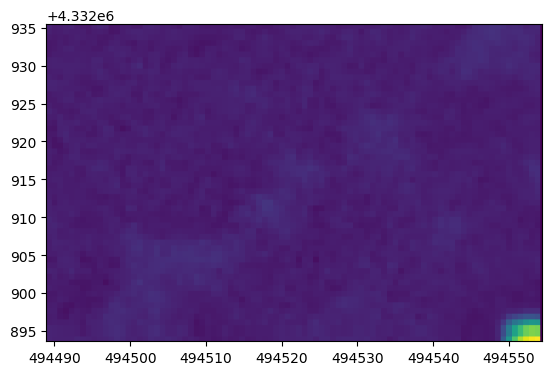

geosat nir


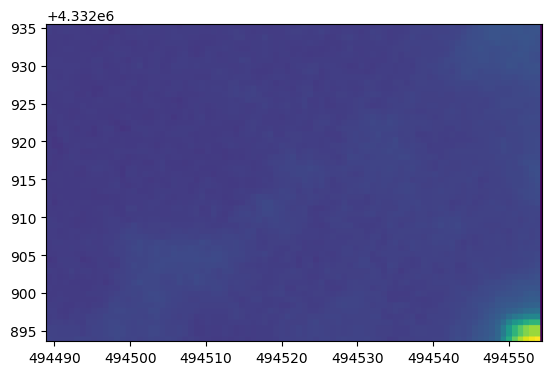

geosat red


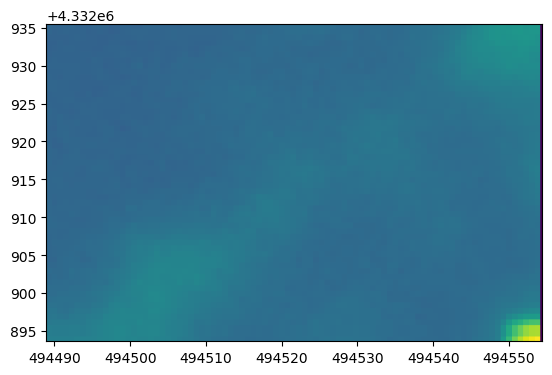

geosat green


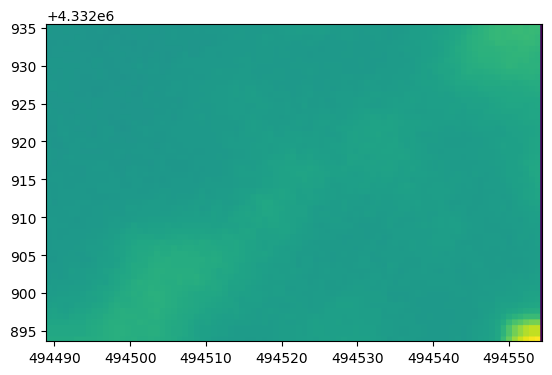

geosat blue


In [ ]:
rasterio.plot.show(geosat_resampled[0], transform=mosaic_tif.transform)
print("geosat nir")

rasterio.plot.show(geosat_resampled[1], transform=mosaic_tif.transform)
print("geosat red")

rasterio.plot.show(geosat_resampled[2], transform=mosaic_tif.transform)
print("geosat green")

rasterio.plot.show(geosat_resampled[3], transform=mosaic_tif.transform)
print("geosat blue")

In [ ]:
## COMPARE ##

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import numpy as np

# --- 1. Load reference and target ---
ref = mosaic_seg_tif.read()       # (bands, height, width)

min_vals = geosat_resampled.min(axis=(1, 2), keepdims=True)
max_vals = geosat_resampled.max(axis=(1, 2), keepdims=True)
geosat_resampled_normalized = (geosat_resampled - min_vals) / (max_vals - min_vals + 1e-10)


# ndvi = (geosat_resampled[0] - geosat_resampled[1]) / (geosat_resampled[0] + geosat_resampled[1])
# ndvi = np.expand_dims(ndvi, axis=0)
# geosat_resampled = np.concatenate((geosat_resampled, ndvi), axis=0)

# target = geosat_resampled[0]      # nir
# target = geosat_resampled[1]      # red
# target = geosat_resampled[2]      # green
target = geosat_resampled[3]      # blue
# target = geosat_resampled[4]      # ndvi

# --- 2. Create green mask (ground truth) ---
alpha_mask = ref[3] > 0
R, G, B = ref[0], ref[1], ref[2]
green_mask = (R == 0) & (G == 255) & (B == 0)

# --- 3. Define valid mask once (alpha>0 and target != 0) ---
valid_mask = alpha_mask & (target != 0)
ignored_mask = ~valid_mask  # pixels ignored due to alpha=0 or target=0

# --- 4. Sweep thresholds and compute metrics ---
results = []

values = np.linspace(0, 1, 100)

for thr in values:
    pred_mask = target < thr  # predicted positive pixels

    # Compute confusion matrix only on valid pixels
    TP = np.sum(pred_mask & green_mask & valid_mask)
    TN = np.sum(~pred_mask & ~green_mask & valid_mask)
    FP = np.sum(pred_mask & ~green_mask & valid_mask)
    FN = np.sum(~pred_mask & green_mask & valid_mask)

    # Metrics
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    fallout = FP / (FP + TN) if (FP + TN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-9)

    results.append((thr, accuracy, precision, recall, fallout, f1))

# --- 5. Convert results to structured array ---
results = np.array(results, dtype=[
    ('threshold', float), ('accuracy', float),
    ('precision', float), ('recall', float),
    ('fallout', float), ('f1', float)
])

# --- 6. Find best threshold by F1-score ---
best_idx = np.argmax(results['f1'])
best_thr = results['threshold'][best_idx]
pred_mask_best = target < best_thr

# --- 7. Final valid mask for plotting ---
valid_mask_best = valid_mask  # same as before
ignored_mask = ~valid_mask_best

# --- 8. Visualization function ---
def plot_mask(mask, ignored_mask, title):
    h, w = mask.shape
    rgb = np.zeros((h, w, 3), dtype=np.float32)

    # Valid mask: green
    rgb[..., 1] = mask & (~ignored_mask)

    # Ignored pixels: whitesmoke
    rgb[ignored_mask] = mcolors.to_rgb("whitesmoke")

    plt.figure(figsize=(8,8))
    plt.imshow(rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# --- 9. Plot original mosaic with ignored pixels in red ---
mosaic_rgb = np.dstack([R, G, B]).astype(np.float32) / 255.0
overlay = mosaic_rgb.copy()
overlay[ignored_mask] = mcolors.to_rgb("whitesmoke")  # ignored areas
plt.figure(figsize=(8,8))
plt.imshow(overlay)
plt.title('mosaic_seg')
plt.axis('off')
plt.show()

# --- 10. Plot green mask with ignored areas ---
plot_mask(green_mask, ignored_mask, 'Green mask')

# --- 11. Plot predicted mask at best threshold with ignored areas ---
plot_mask(pred_mask_best, ignored_mask, f'Predicted mask at best threshold {best_thr:.4f}')

# --- 12. Print metrics ---
best = results[best_idx]
print(f"\n✅ Best threshold: {best_thr:.4f}")
print(f"Accuracy:  {best['accuracy']:.4f}")
print(f"Precision: {best['precision']:.4f}")
print(f"Recall:    {best['recall']:.4f}")
print(f"Fallout:   {best['fallout']:.4f}")
print(f"F1-score:  {best['f1']:.4f}")

# --- 13. Final confusion visualization ---
h, w = target.shape
conf_rgb = np.zeros((h, w, 3), dtype=np.float32)

# Compute TP, TN, FP, FN for best threshold
TP_mask = pred_mask_best & green_mask & valid_mask_best
TN_mask = ~pred_mask_best & ~green_mask & valid_mask_best
FP_mask = pred_mask_best & ~green_mask & valid_mask_best
FN_mask = ~pred_mask_best & green_mask & valid_mask_best

# Assign colors
conf_rgb[TP_mask]      = mcolors.to_rgb("lime")
conf_rgb[TN_mask]      = mcolors.to_rgb("black")
conf_rgb[FP_mask]      = mcolors.to_rgb("turquoise")
conf_rgb[FN_mask]      = mcolors.to_rgb("orange")
conf_rgb[ignored_mask] = mcolors.to_rgb("whitesmoke")

# Ensure values <=1
conf_rgb = np.clip(conf_rgb, 0, 1)

# --- Plot ---
plt.figure(figsize=(8,8))
plt.imshow(conf_rgb)
plt.title(f'Confusion visualization at best threshold {best_thr:.4f}')
plt.axis('off')

# --- Add legend ---
legend_patches = [
    mpatches.Patch(color="lime", label="TP"),
    mpatches.Patch(color="black", label="TN"),
    mpatches.Patch(color="turquoise", label="FP"),
    mpatches.Patch(color="orange", label="FN"),
    mpatches.Patch(color="whitesmoke", label="Ignored")
]
plt.legend(handles=legend_patches, loc="upper right", bbox_to_anchor=(1.15, 1))

plt.show()



# crs
# capes platero

# resample a ortofoto
# pca 3 components principals
# random forest de seg(po, arena, other) vs (nirredgreenblue, nirredgreenbluendvi, pca1, pca2, pca3)


NameError: name 'mosaic_seg_tif' is not defined